In [176]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/HMFMOLD.ttf'
font_name = fm.FontProperties(fname=path, size=20)
#plt.rc('font', family=font_name)

In [20]:
path = 'C:/dacon/covid-19/'

# 8자리 행정동 코드 데이터
adstrd_master = pd.read_csv(path+'adstrd_master.csv')

# 업종 별 결제금액 데이터
card = pd.read_csv(path+'card.csv')

# 배달 호출 정보 데이터
delivery = pd.read_csv(path+'delivery.csv')

# 행정동별 유동인구 데이터
fpopl = pd.read_csv(path+'fpopl.csv')

# 품목 별 소비지수 데이터
index = pd.read_csv(path+'index.csv')

FileNotFoundError: [Errno 2] File b'C:/dacon/covid-19/PatientInfo.csv' does not exist: b'C:/dacon/covid-19/PatientInfo.csv'

In [22]:
# 코로나 환자 데이터
patientinfo = pd.read_csv(path+"COVID_19/"+'PatientInfo.csv')

In [26]:
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


In [38]:
delivery.tail()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
5158319,10672688,2020-06-21,C000312,1,C000312,S0029529,야식,4125010200,경기도,동두천시,...,D0013004,3000,500,26000,1,승인:하나카드,2020-06-21 22:48:22,2020-06-21 22:48:37,2020-06-21 23:07:47,NaN
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
5158321,10672690,2020-06-21,C000130,1,C000130,S0042234,야식,4128112300,경기도,고양시 덕양구,...,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN
5158322,10672691,2020-06-21,C000237,1,C000237,S0021766,족발/보쌈,4121010200,경기도,광명시,...,D0004485,3630,200,53700,1,승인:비씨카드사,2020-06-21 23:10:38,2020-06-21 23:11:03,2020-06-21 23:25:10,NaN
5158323,10672692,2020-06-21,C000209,1,C000209,S0022227,야식,1154510300,서울특별시,금천구,...,D0006541,4730,300,46000,2,NaN,2020-06-21 23:04:50,2020-06-21 23:14:35,2020-06-21 23:28:22,NaN


In [ ]:
delivery['PROCESS_DT']

In [29]:
delivery['GOODS_AMOUNT']

0          25000
1          49000
2          23000
3          20000
4          32000
           ...  
5158319    26000
5158320    22000
5158321    17000
5158322    53700
5158323    46000
Name: GOODS_AMOUNT, Length: 5158324, dtype: int64

In [35]:
delivery_by_date = delivery.groupby(by='PROCESS_DT').mean()

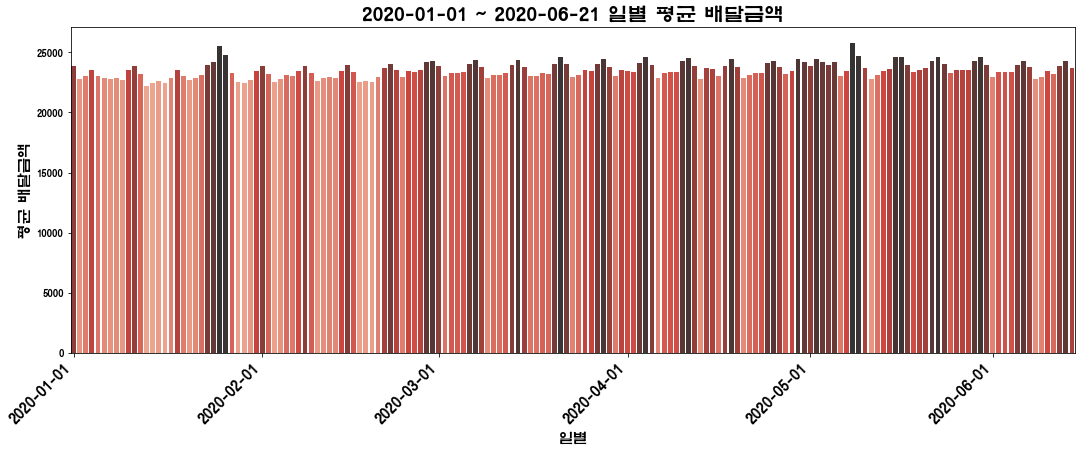

In [82]:
plt.figure(figsize=(18, 6))

pal = sns.color_palette("Reds_d", delivery_by_date.shape[0])
rank = delivery_by_date['GOODS_AMOUNT'].argsort().argsort()
sns.barplot(data=delivery_by_date, x=delivery_by_date.index, y=delivery_by_date['GOODS_AMOUNT'], palette=np.array(pal[::-1])[rank])

##세로선 밑 범주 표시
#plt.axvline(7.5, color='red', label='2020-01-01 ~ 2020-06-21 일별 평균 배달금액')
#plt.axvspan(7.5, 26.5, facecolor='red', alpha=0.1)
#plt.legend(fontsize=15)

plt.title('2020-01-01 ~ 2020-06-21 일별 평균 배달금액', size=20)
plt.xticks([0, 31, 60, 91, 121, 151],
           [delivery_by_date.index[0], delivery_by_date.index[31], delivery_by_date.index[60],
            delivery_by_date.index[91], delivery_by_date.index[121], delivery_by_date.index[151]], rotation=45, size=15, ha='right')
plt.xlabel('일별', size=15)
plt.ylabel('평균 배달금액', size=15)
plt.show()

일별 평균 배달금액(상품금액)은 코로나가 심해기지 전과 후, 별 차이가 없다.

In [86]:
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


In [115]:
delivery['DLVR_RCEPT_HOURS'] = [int(x.split(' ')[-1].split(':')[0]) for x in delivery['DLVR_RCEPT_TIME']]

In [129]:
delivery_by_date = delivery.groupby(by='PROCESS_DT').mean()

In [130]:
delivery_by_date

,SERIAL_NUMBER,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_HOURS
PROCESS_DT,,,,,,,,,,,,,
2020-01-01,4.596266e+06,1.025573,3.576332e+09,3.576378e+09,3.580009e+11,3.507752e+09,3.508227e+09,3.507653e+11,3648.488283,247.107056,23835.589602,1.805335,16.177746
2020-01-02,4.627692e+06,1.015661,3.651538e+09,3.651583e+09,3.652501e+11,3.583186e+09,3.583485e+09,3.582221e+11,3590.445325,258.664896,22779.836203,1.832769,16.648182
2020-01-03,4.656085e+06,1.015119,3.629072e+09,3.629117e+09,3.631108e+11,3.566001e+09,3.566341e+09,3.568380e+11,3577.477630,261.185205,23013.795511,1.810437,17.116245
2020-01-04,4.689185e+06,1.014859,3.612388e+09,3.612433e+09,3.615399e+11,3.543683e+09,3.543907e+09,3.545591e+11,3592.940530,258.906480,23503.883058,1.806330,16.775912
2020-01-05,4.725137e+06,1.016552,3.615264e+09,3.615309e+09,3.612240e+11,3.538525e+09,3.538640e+09,3.537775e+11,3611.579689,257.382404,23041.287635,1.826247,16.340206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-10,1.046903e+07,1.024229,3.734987e+09,3.735030e+09,3.732152e+11,3.674849e+09,3.675526e+09,3.669753e+11,3724.975273,262.183312,23407.795477,1.737966,16.878300
2020-06-11,1.050835e+07,1.015633,3.739473e+09,3.739516e+09,3.736636e+11,3.687624e+09,3.687768e+09,3.680594e+11,3664.767611,271.977444,23156.616003,1.744321,16.605889
2020-06-12,1.054898e+07,1.015025,3.728474e+09,3.728517e+09,3.723977e+11,3.668859e+09,3.669243e+09,3.666040e+11,3676.447495,267.601604,23864.749235,1.747608,17.127946


In [133]:
delivery_by_date['DLVR_RCEPT_HOURS'].tail()

PROCESS_DT
2020-06-10    16.878300
2020-06-11    16.605889
2020-06-12    17.127946
2020-06-20    16.644031
2020-06-21    16.199273
Name: DLVR_RCEPT_HOURS, dtype: float64

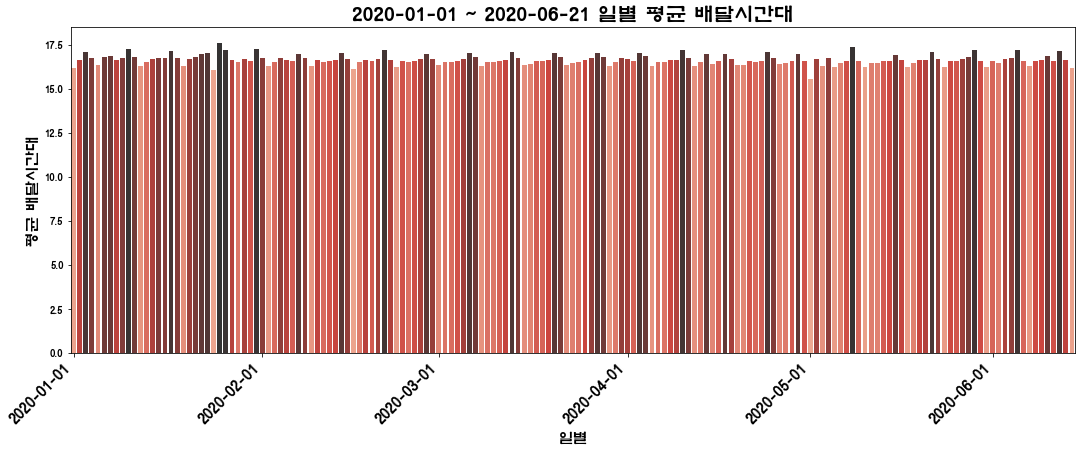

In [132]:
plt.figure(figsize=(18, 6))

pal = sns.color_palette("Reds_d", delivery_by_date.shape[0])
rank = delivery_by_date['DLVR_RCEPT_HOURS'].argsort().argsort()
sns.barplot(data=delivery_by_date, x=delivery_by_date.index, y=delivery_by_date['DLVR_RCEPT_HOURS'], palette=np.array(pal[::-1])[rank])

##세로선 밑 범주 표시
#plt.axvline(7.5, color='red', label='2020-01-01 ~ 2020-06-21 일별 평균 배달금액')
#plt.axvspan(7.5, 26.5, facecolor='red', alpha=0.1)
#plt.legend(fontsize=15)

plt.title('2020-01-01 ~ 2020-06-21 일별 평균 배달시간대', size=20)
plt.xticks([0, 31, 60, 91, 121, 151],
           [delivery_by_date.index[0], delivery_by_date.index[31], delivery_by_date.index[60],
            delivery_by_date.index[91], delivery_by_date.index[121], delivery_by_date.index[151]], rotation=45, size=15, ha='right')
plt.xlabel('일별', size=15)
plt.ylabel('평균 배달시간대', size=15)
plt.show()

In [135]:
patientinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
patient_id            5165 non-null int64
sex                   4043 non-null object
age                   3785 non-null object
country               5165 non-null object
province              5165 non-null object
city                  5071 non-null object
infection_case        4246 non-null object
infected_by           1346 non-null object
contact_number        791 non-null object
symptom_onset_date    690 non-null object
confirmed_date        5162 non-null object
released_date         1587 non-null object
deceased_date         66 non-null object
state                 5165 non-null object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [138]:
patientinfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,서울,강서구,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,서울,중랑구,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,서울,종로구,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,서울,마포구,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,서울,성북구,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [142]:
patientinfo_by_date = patientinfo.groupby(by='confirmed_date').count()

In [143]:
patientinfo_by_date

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,released_date,deceased_date,state
confirmed_date,,,,,,,,,,,,,
2020-01-20,1,1,1,1,1,1,1,0,0,1,1,0,1
2020-01-23,1,1,1,1,1,1,1,0,1,1,1,0,1
2020-01-26,1,1,1,1,1,1,1,0,1,0,1,0,1
2020-01-27,1,1,1,1,1,1,1,0,1,0,1,0,1
2020-01-30,4,4,4,4,4,4,4,1,4,1,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,40,5,4,40,40,40,40,7,2,5,0,0,40
2020-06-27,48,18,17,48,48,43,45,19,9,8,0,0,48
2020-06-28,38,14,13,38,38,33,35,15,4,13,0,0,38


In [ ]:
## 그래프1 - 누적 확진자/완치자 수 추이
plt.figure(figsize=(18,8))
plt.plot( Time_df.date, Time_df.confirmed, 'tab:blue', linewidth=3, label='누적 확진자 수' )
plt.plot( Time_df.date, Time_df.released, 'tab:green', linewidth=3, label='누적 완치자 수' )
plt.bar( Time_df.date, Time_df.active, color='tab:purple', alpha=0.3, label='격리된 환자 수' )

plt.title('국내 코로나19 확진자/완치자 수 추이', fontproperties=font_prop_size20)
plt.xticks( ticks=Time_df.date,
            labels=[ date[2:] if idx%3==0 else '' for idx, date in enumerate(Time_df.date.astype(str)) ],
            rotation=90, size=15)
plt.yticks( ticks=range(0, 11000, 1000) )
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on', labelsize=15)
plt.legend(prop=font_prop_size20, loc='upper left')
plt.grid()

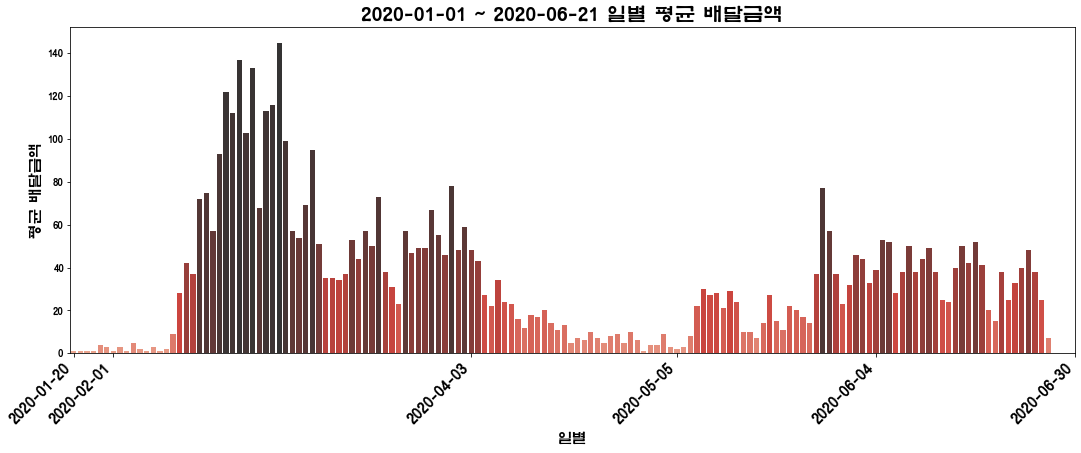

In [153]:
plt.figure(figsize=(18, 6))

pal = sns.color_palette("Reds_d", patientinfo_by_date.shape[0])
rank = patientinfo_by_date['patient_id'].argsort().argsort()
sns.barplot(data=patientinfo_by_date, x=patientinfo_by_date.index, y=patientinfo_by_date['patient_id'], palette=np.array(pal[::-1])[rank])

##세로선 밑 범주 표시
#plt.axvline(7.5, color='red', label='2020-01-01 ~ 2020-06-21 일별 평균 배달금액')
#plt.axvspan(7.5, 26.5, facecolor='red', alpha=0.1)
#plt.legend(fontsize=15)

plt.title('2020-01-01 ~ 2020-06-21 일별 평균 배달금액', size=20)
plt.xticks([0, 6, 60, 91, 121, 151],
           [patientinfo_by_date.index[0], patientinfo_by_date.index[6], patientinfo_by_date.index[60],
            patientinfo_by_date.index[91], patientinfo_by_date.index[121], patientinfo_by_date.index[147]], rotation=45, size=15, ha='right')
plt.xlabel('일별', size=15)
plt.ylabel('평균 배달금액', size=15)
plt.show()

In [147]:
patientinfo_by_date['patient_id'].sum()

5162

In [155]:
path = 'C:/dacon/covid-19/COVID_19/'

In [159]:
from datetime import datetime, timedelta

In [163]:
# 데이터 로드
Time_df = pd.read_csv(path+'Time.csv')
TimeProvince_df = pd.read_csv(path+'TimeProvince.csv')
#Region_df = pd.read_csv(path+'Region_sido_addPop_addHospital.csv')  # Region.csv + 외부 수집 데이터
PatientInfo_df = pd.read_csv(path+'PatientInfo.csv')

In [164]:
# Time_df 데이터 전처리 - 파생변수 생성 : new_comfirmed(일일 확진자 수), new_released(일일 완치자 수), new_deceased(일일 사망자 수)
Time_df['date'] = pd.to_datetime(Time_df['date'])

tmp_df = Time_df[['date','confirmed', 'released', 'deceased']].rename(columns={'confirmed':'confirmed_D-1', 'released':'released_D-1', 'deceased':'deceased_D-1'})
tmp_df['date'] = tmp_df['date'] + timedelta(days=1)
Time_df = pd.merge(Time_df, tmp_df, how='left', on=['date'])
del tmp_df

Time_df[['confirmed_D-1', 'released_D-1', 'deceased_D-1']] = Time_df[['confirmed_D-1', 'released_D-1', 'deceased_D-1']].fillna(0).astype(int)
Time_df['new_confirmed'] = Time_df['confirmed'] - Time_df['confirmed_D-1']
Time_df['new_released'] = Time_df['released'] - Time_df['released_D-1']
Time_df['new_deceased'] = Time_df['deceased'] - Time_df['deceased_D-1']
Time_df = Time_df.drop(columns=['time', 'test', 'negative', 'confirmed_D-1', 'released_D-1', 'deceased_D-1'])


# Time_df 데이터 전처리 - 파생변수 생성 : active(격리된 환자 수) = confirmed - deceased - released
Time_df['active'] = Time_df.confirmed - Time_df.released - Time_df.deceased

In [165]:
# 가장 최근 날짜의 전국 현황 추출
recent_korea = Time_df.loc[len(Time_df)-1]

In [187]:
Time_df[Time_df['new_confirmed']==Time_df['new_confirmed'].max()]

,date,confirmed,released,deceased,new_confirmed,new_released,new_deceased,active
40,2020-02-29,3150,28,17,813,1,4,3105


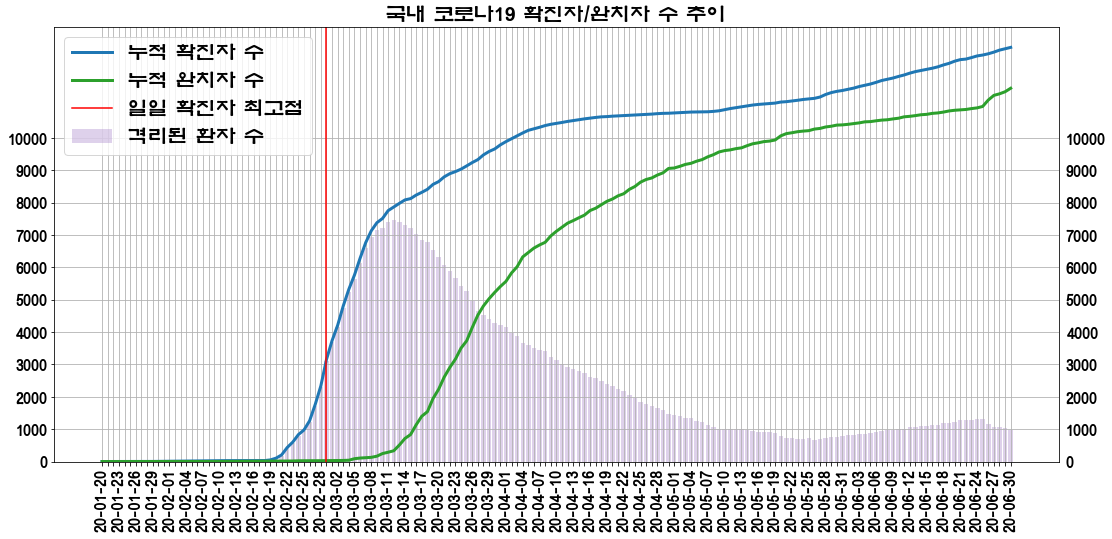

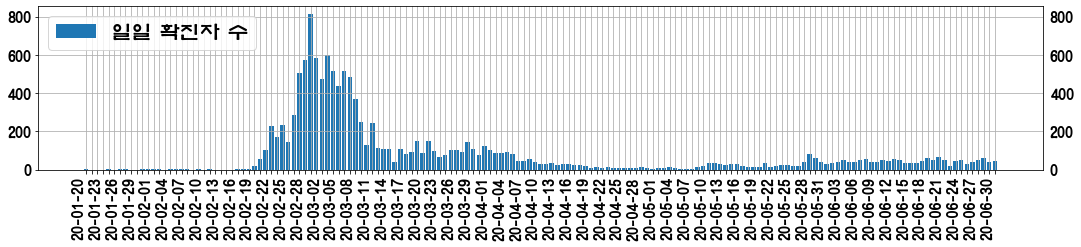

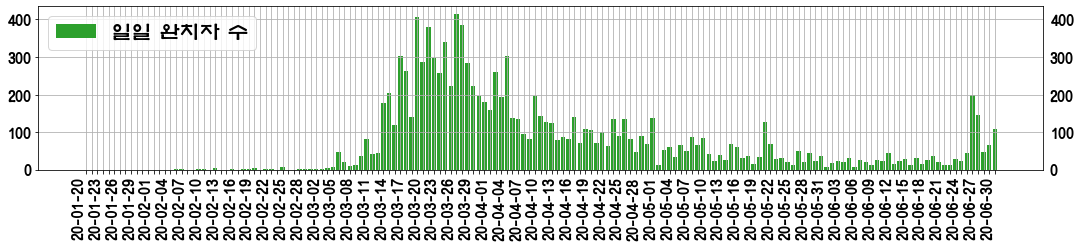

In [189]:
# 2020년 3월 기준 대한민국 인구 추출 (출처 : 행정안전부 주민등록 인구통계) - Region_df
#pop_korean = int(Region_df.loc[Region_df.province=='Korea', 'pop_total'])

# 최근 날짜의 현황 출력
# print(f'({pd.to_datetime(recent_korea.date).strftime("%Y-%m-%d")} 기준)')
# print(f'전국 누적 확진자 : {recent_korea.confirmed:>5} 명 '+
#       f'(인구 대비 확진자 비율 : {recent_korea.confirmed/pop_korean*100:.2f}%)')
# print(f'전국 누적 완치자 : {recent_korea.released:>5} 명 '+
#       f'(완치율 : {recent_korea.released/recent_korea.confirmed*100:.2f}%)')
# print(f'전국 치료중 환자 : {recent_korea.active:>5} 명')


## 그래프1 - 누적 확진자/완치자 수 추이
plt.figure(figsize=(18,8))
plt.plot( Time_df.date, Time_df.confirmed, 'tab:blue', linewidth=3, label='누적 확진자 수' )
plt.plot( Time_df.date, Time_df.released, 'tab:green', linewidth=3, label='누적 완치자 수' )
plt.bar( Time_df.date, Time_df.active, color='tab:purple', alpha=0.3, label='격리된 환자 수' )

#세로선 밑 범주 표시
new_confirmed_high = Time_df[Time_df['new_confirmed']==Time_df['new_confirmed'].max()].date

plt.axvline(new_confirmed_high, color='red', label='일일 확진자 최고점')
#plt.axvspan(7.5, 26.5, facecolor='red', alpha=0.1)
plt.legend(fontsize=10)

plt.title('국내 코로나19 확진자/완치자 수 추이', fontproperties=font_name)
plt.xticks( ticks=Time_df.date,
            labels=[ date[2:] if idx%3==0 else '' for idx, date in enumerate(Time_df.date.astype(str)) ],
            rotation=90, size=15)
plt.yticks( ticks=range(0, 11000, 1000) )
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on', labelsize=15)
plt.legend(prop=font_name, loc='upper left')
plt.grid()


## 그래프2 - 일일 확진자, 사망자, 완치자 수
def daily_barplot( x=Time_df.date, y=Time_df.new_confirmed, color='tab:red', label='일일 확진자 수' ):
    plt.figure(figsize=(18,3))
    plt.bar( x, y, color=color, label=label )
    plt.xticks( ticks=Time_df.date,
                labels=[ date[2:] if idx%3==0 else '' for idx, date in enumerate(Time_df.date.astype(str)) ],
                rotation=90, horizontalalignment='right', size=15)
    plt.tick_params(axis='y', which='both', labelleft='off', labelright='on', labelsize=15)
    plt.legend(prop=font_name, loc='upper left')
    plt.grid()
    plt.show()
    pass

daily_barplot( x=Time_df.date, y=Time_df.new_confirmed, color='tab:blue', label='일일 확진자 수' )
daily_barplot( Time_df.date, Time_df.new_released, color='tab:green', label='일일 완치자 수' )

In [229]:
line = str(new_confirmed_high).split()[1]

In [232]:
delivery['new_confirmed_high'] = delivery['PROCESS_DT']>line

In [233]:
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,DLVR_RCEPT_HOURS,new_confirmed_high
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN,0,False
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN,1,False
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN,0,False
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN,1,False
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN,1,False


In [235]:
delivery.groupby(by='new_confirmed_high').mean()

,SERIAL_NUMBER,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_HOURS
new_confirmed_high,,,,,,,,,,,,,
False,5.594962e+06,1.019422,3.669806e+09,3.669850e+09,3.670891e+11,3.603731e+09,3.604262e+09,3.602664e+11,3625.181347,261.663946,23254.829843,1.826427,16.694760
True,8.634881e+06,1.014299,3.721152e+09,3.721195e+09,3.719600e+11,3.656094e+09,3.656592e+09,3.653983e+11,3669.660859,269.775403,23747.009287,1.768776,16.625634


대략적으로 봤지만, 코로나 일일 확진자가 최고점을 찍은 이후로 평균 배달접수 시각이 앞당겨졌으며, 평균 배달 상품 금액이 증가하였다.

제대로된 기준으로 다시 분석 필요